In [14]:
import pandas as pd
# Load the uploaded dataset
file_path = r"C:\e\leetcode\nullmax\null1138498682.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()

,0,1,2,3,4,5,6
0,0.003521,0.678261,0.363636,0.604003,0.224299,0.477273,0.066179
1,0.021127,0.713043,0.418182,0.618797,0.233645,0.636364,0.557475
2,0.126761,0.730435,0.436364,0.509536,0.271028,0.715909,0.957646
3,0.454225,0.686957,0.454545,0.597773,0.429907,0.750000,0.258835
4,0.728873,0.547826,0.454545,0.555343,0.691589,0.772727,0.888624


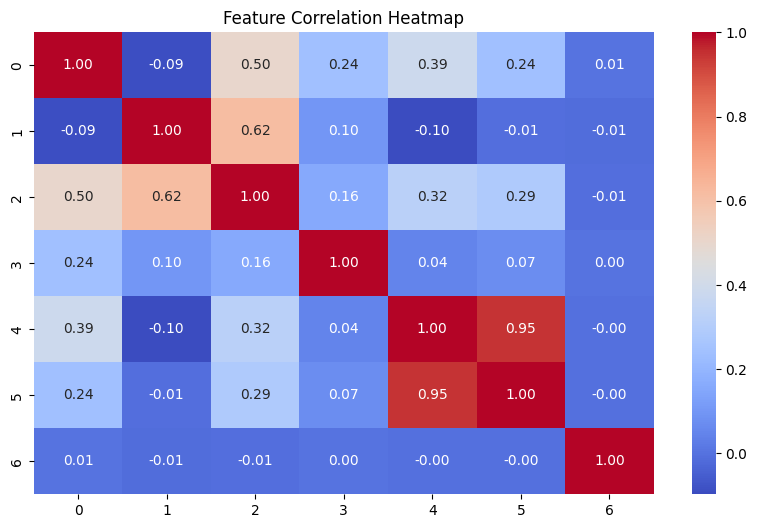

,0,1,2,3,4,5,6
count,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000,8270.000000
mean,0.856608,0.182596,0.420405,0.630763,0.667138,0.764879,0.505954
std,0.082998,0.057097,0.091203,0.090271,0.105422,0.131926,0.286744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007
25%,0.806338,0.156522,0.381818,0.582979,0.598131,0.681818,0.262111
50%,0.866197,0.182609,0.436364,0.630213,0.672897,0.772727,0.507067
75%,0.908451,0.200000,0.472727,0.675068,0.738318,0.852273,0.752515
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999965


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 基本统计描述
desc_stats = df.describe()

# 相关系数矩阵
correlation_matrix = df.corr()

# 可视化相关系数热力图
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

desc_stats


# 数据统计分析总结：
## 描述性统计：
- 所有变量均标准化在 [0, 1] 区间（可能是归一化处理）
- y（第0列）的均值为 0.8566，标准差为 0.083，数据略偏集中
- 其余变量 x1~x6 的标准差变化范围在 [0.057, 0.286]，说明第6列（x6）波动性最大
# 相关性分析（从热力图可见）：
- y 与特征 x3, x4, x5 有中等相关性（相关系数在 0.3~0.6 左右）
- x2 和 x5、x3 和 x4 之间存在一定相关性（可能存在共线性风险）

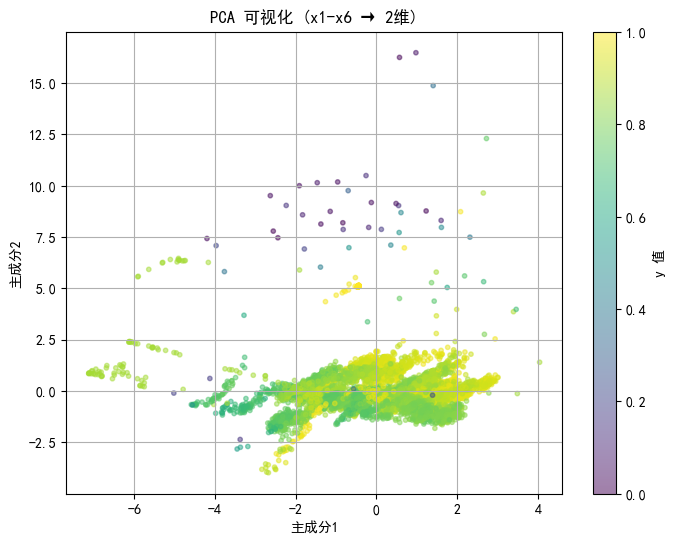

各主成分的方差解释率: [0.36012358 0.25551495]
累计解释率: 0.6156385209309883


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# font.family         : sans-serif
# font.sans-serif     : SimHei


# 加载数据
df = pd.read_csv('null1138498682.csv')  # 修改为你的本地路径

# 提取特征（x1 - x6），并标准化
X = df.iloc[:, 1:7]
y = df.iloc[:, 0]  # y值用于颜色可视化

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 执行 PCA 降维至 2 维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 可视化 PCA 结果
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10, alpha=0.5)
plt.colorbar(scatter, label='y 值')
plt.title('PCA 可视化 (x1-x6 → 2维)')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.grid(True)
plt.show()

# 显示每个主成分解释的方差比例
print("各主成分的方差解释率:", pca.explained_variance_ratio_)
print("累计解释率:", sum(pca.explained_variance_ratio_))


可视化分析：图中显示大部分样本点集中在主成分1与2形成的带状区域内，颜色变化（y 值）呈一定规律分布，说明降维后仍有较好的可分性。

XGBoost 回归模型评价：
均方误差 MSE: 0.0015
R2 决定系数: 0.8228


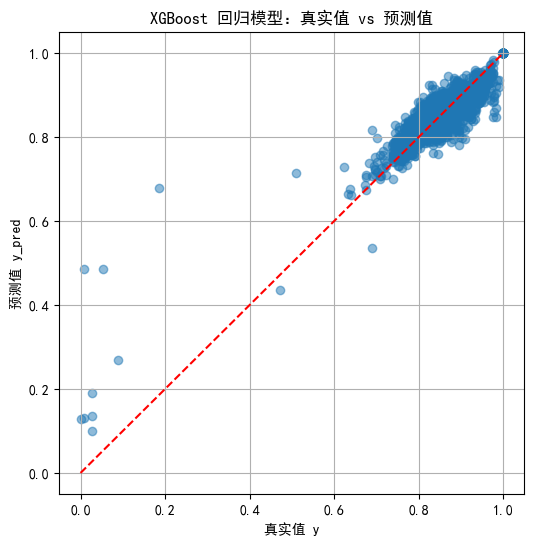

估计置信区间，请稍等...


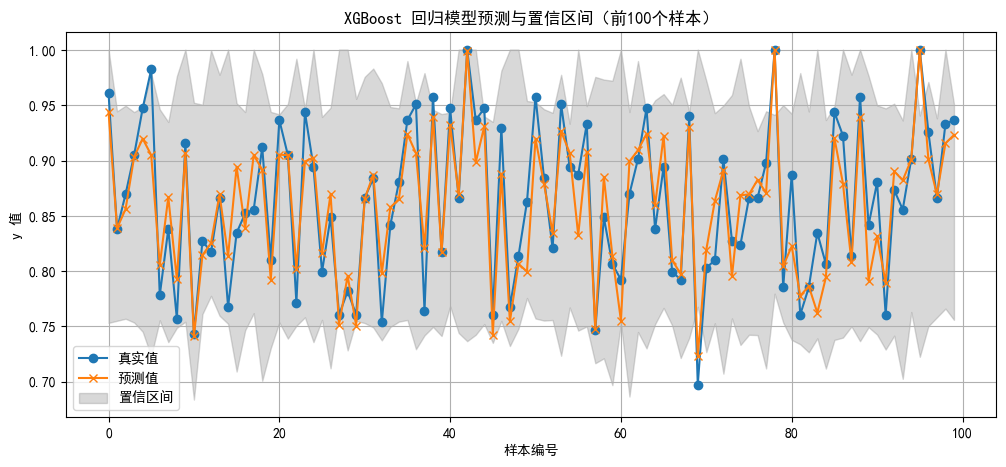

In [13]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

# 1. 读取数据
df = pd.read_csv('null1138498682.csv')
X = df.iloc[:, 1:7]
y = df.iloc[:, 0]

# 2. 拆分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 模型训练
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 4. 模型预测与评估
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost 回归模型评价：")
print(f"均方误差 MSE: {mse:.4f}")
print(f"R2 决定系数: {r2:.4f}")

# 5. 可视化真实值 vs 预测值
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("真实值 y")
plt.ylabel("预测值 y_pred")
plt.title("XGBoost 回归模型：真实值 vs 预测值")
plt.grid(True)
plt.show()

# 6. 置信区间估计（Bootstrap 方法）
print("估计置信区间，请稍等...")
n_iterations = 100
alpha = 0.95
preds_bootstrap = []

for _ in range(n_iterations):
    X_, y_ = resample(X_test, y_test)
    preds_ = model.predict(X_)
    preds_bootstrap.append(preds_)

preds_bootstrap = np.array(preds_bootstrap)
lower = np.percentile(preds_bootstrap, (1 - alpha) / 2 * 100, axis=0)
upper = np.percentile(preds_bootstrap, (1 + alpha) / 2 * 100, axis=0)

# 7. 可视化预测置信区间（示例：前100个）
plt.figure(figsize=(12, 5))
x_range = np.arange(len(y_test[:100]))
plt.plot(x_range, y_test[:100].values, label='真实值', marker='o')
plt.plot(x_range, y_pred[:100], label='预测值', marker='x')
plt.fill_between(x_range, lower[:100], upper[:100], color='gray', alpha=0.3, label='置信区间')
plt.legend()
plt.title('XGBoost 回归模型预测与置信区间（前100个样本）')
plt.xlabel('样本编号')
plt.ylabel('y 值')
plt.grid(True)
plt.show()


Lasso 回归 MSE: 0.0083, R2: -0.0012
随机森林回归 MSE: 0.0010, R2: 0.8776


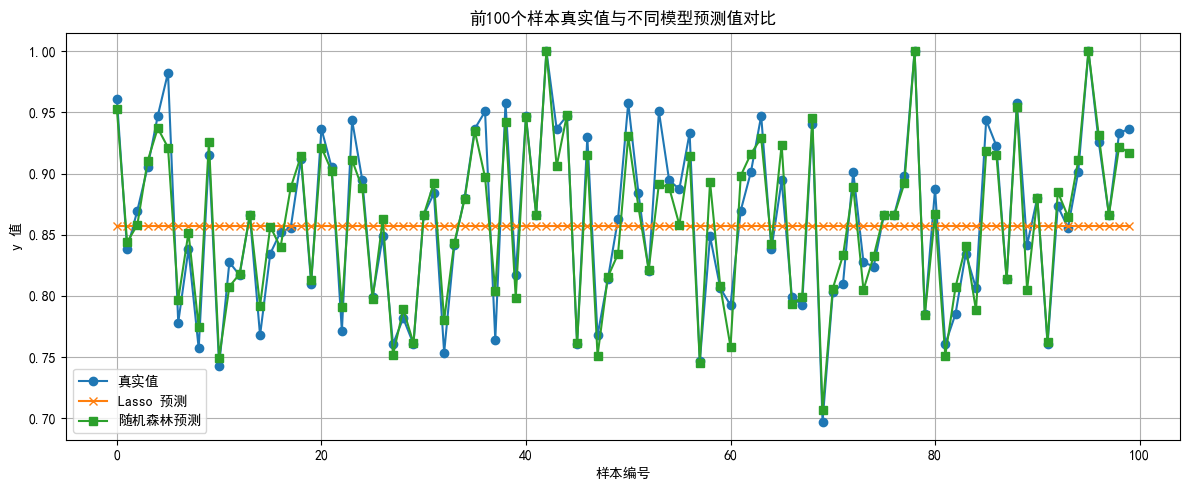

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 读取数据
df = pd.read_csv('null1138498682.csv')
X = df.iloc[:, 1:7]
y = df.iloc[:, 0]

# 拆分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型1：Lasso 回归
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# 模型2：随机森林回归
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 输出评估结果
print(f"Lasso 回归 MSE: {mse_lasso:.4f}, R2: {r2_lasso:.4f}")
print(f"随机森林回归 MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}")

# 可视化对比预测效果
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='真实值', marker='o')
plt.plot(y_pred_lasso[:100], label='Lasso 预测', marker='x')
plt.plot(y_pred_rf[:100], label='随机森林预测', marker='s')
plt.title('前100个样本真实值与不同模型预测值对比')
plt.xlabel('样本编号')
plt.ylabel('y 值')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


| 模型名称 | 特点 | 是否需标准化 | 是否抗噪声 | 可解释性 | 非线性建模能力 |
|----------|------|--------------|------------|----------|----------------|
| Lasso    | 稀疏特征选择，线性建模 | 是         | 一般       | 高         | 否             |
| 随机森林 | 集成非线性模型，鲁棒性强 | 否         | 强         | 中         | 是             |
| XGBoost  | 梯度提升树，高性能，支持正则和缺失值 | 否         | 强         | 中         | 是             |